In [1]:
import pandas as pd
import zipfile
import pickle
import re

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 


In [5]:
z = zipfile.ZipFile("/Users/Pking/PycharmProjects/comp7103/YouTube-Spam-Collection-v1.zip")
Psy = pd.read_csv(z.open("Youtube01-Psy.csv"))
KatyPerry = pd.read_csv(z.open("Youtube02-KatyPerry.csv"))
LMFAO = pd.read_csv(z.open("Youtube03-LMFAO.csv"))
Eminem = pd.read_csv(z.open("Youtube04-Eminem.csv"))
Shakira = pd.read_csv(z.open("Youtube05-Shakira.csv"))

In [42]:
train_data = pd.concat([Psy, KatyPerry])
train_data.drop(["COMMENT_ID","DATE","AUTHOR"], axis = 1, inplace = True)
train_data["CONTENT"] = train_data["CONTENT"].str.lower()
train_data["attrL"] = train_data["CONTENT"].map(lambda x: len(str(x)))
train_data["attrU"] = train_data["CONTENT"].str.contains("(http|https)://").astype(int)
train_data["attrH"] = train_data["CONTENT"].str.contains("&+;").astype(int)
# train_data["and"] = train_data["CONTENT"].map(lambda x: x.count("and"))
train_data

/Users/Pking/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """


,CONTENT,CLASS,attrL,attrU,attrH
0,"huh, anyway check out this you[tube] channel: ...",1,56,0,0
1,hey guys check out my new channel and our firs...,1,166,0,0
2,just for test i have to say murdev.com,1,38,0,0
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,48,0,0
4,watch?v=vtarggvgtwq check this out .﻿,1,39,0,0
...,...,...,...,...,...
345,this song means so much to me thank you soooo...,0,95,0,0
346,&lt;3﻿,0,6,0,0
347,"katy perry, i am the ""décio cabelo"", ""decio ha...",1,439,0,0
348,honestly speaking except taylor swift and adel...,0,195,0,0


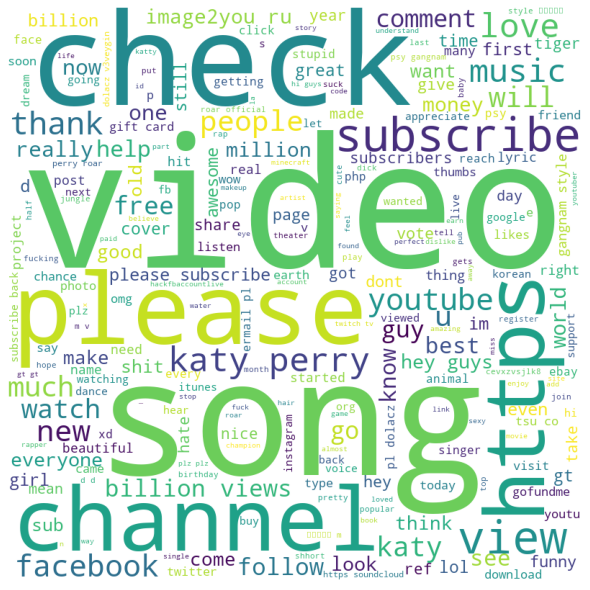

In [33]:
def plotWorldCloud(train_data,stopwords,maxWords=500):
    comment_words = '' 
    # iterate through the csv file 
    for val in train_data.CONTENT: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 
        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords,
                    max_words = maxWords,
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image					 
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 
    
STOPWORDS = ['amp','lt','lot','their', 'they', 'else', "hadn't", 'have', 'our', "shouldn't", "aren't", "can't", 'because', 'the', 'herself', 'cannot', 'me', "let's", 'own', "when's", 'an', 'not', 'both', "they've", "mustn't", "why's", 'ourselves', 'themselves', "where's", 'yours', 'you', 'until', "we're", 'how', 'are', 'all', "you're", 'those', 'for', "he's", "i've", 'get', 'into', "isn't", "i'll", 'therefore', 'yourself', 'did', 'is', "she's", 'that', 'him', "don't", 'after', "we'd", "wouldn't", 'with', 'while', 'then', 'above', 'off', "we'll", 'ever', "we've", 'when', "there's", "she'd", 'same', 'of', 'also', 'hence', 'its', 'whom', 'be', 'his', "won't", 'and', "how's", 'theirs', 'i', 'so', 'out', 'from', 'these', 'a', 'but', 'had', 'on', "they'd", 'there', "weren't", 'few', 'your', "you've", 'can', "they're", 'once', 'again', 'under', 'what', 'ought', 'why', 'com', 'itself', "they'll", "you'd", 'since', 'could', "haven't", 'shall', 'he', 'she', 'k', 'more', 'we', 'if', 'no', 'below', 'her', 'too', 'by', 'hers', 'r', 'each', "hasn't", 'to', 'my', "doesn't", "shan't", 'against', "didn't", 'having', 'other', 'them', 'just', "couldn't", 'any', 'has', 'only', "it's", "he'd", 'where', 'down', 'about', 'were', 'does', "that's", "i'm", 'yourselves', 'here', "he'll", 'would', 'this', 'up', 'http', 'some', "she'll", 'it', 'otherwise', 'nor', 'am', 'during', 'who', 'further', 'being', 'doing', 'as', "here's", "what's", 'such', 'ours', 'over', 'or', "i'd", 'been', 'before', 'very', 'than', 'www', 'most', "who's", 'like', 'do', 'should', 'however', 'which', 'at', 'in', 'through', 'was', "you'll", 'myself', 'between', "wasn't", 'himself']


plotWorldCloud(train_data,set(STOPWORDS))


In [43]:
# Based on the item, we choose video
# We add a attribute to count the sum of the number of the top 5 words
# top 5 words based on the word cloud is Video, Song, check, subscribe and channel.
# ctf = core term frequency.
train_data["ctf"] = train_data["CONTENT"].map(lambda x: x.count("video") + x.count("Song") + x.count("check") + x.count("subscribe") + x.count("channel"))
train_data.drop(["CONTENT"], axis = 1, inplace = True)

train_data

,CLASS,attrL,attrU,attrH,ctf
0,1,56,0,0,2
1,1,166,0,0,3
2,1,38,0,0,0
3,1,48,0,0,1
4,1,39,0,0,1
...,...,...,...,...,...
345,0,95,0,0,0
346,0,6,0,0,0
347,1,439,0,0,1
348,0,195,0,0,0


In [44]:
x = pd.get_dummies(train_data.drop(columns="CLASS"))
y = train_data["CLASS"]

x

,attrL,attrU,attrH,ctf
0,56,0,0,2
1,166,0,0,3
2,38,0,0,0
3,48,0,0,1
4,39,0,0,1
...,...,...,...,...
345,95,0,0,0
346,6,0,0,0
347,439,0,0,1
348,195,0,0,0


In [51]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier().fit(x,y)

print(tree.export_text(dtc,feature_names=x.columns.tolist()))

|--- attrU <= 0.50
|   |--- ctf <= 0.50
|   |   |--- attrL <= 32.00
|   |   |   |--- attrL <= 28.00
|   |   |   |   |--- attrL <= 19.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- attrL >  19.50
|   |   |   |   |   |--- attrL <= 20.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- attrL >  20.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- attrL >  28.00
|   |   |   |   |--- attrL <= 29.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- attrL >  29.50
|   |   |   |   |   |--- class: 0
|   |   |--- attrL >  32.00
|   |   |   |--- attrL <= 237.50
|   |   |   |   |--- attrL <= 48.50
|   |   |   |   |   |--- attrL <= 44.50
|   |   |   |   |   |   |--- attrL <= 40.50
|   |   |   |   |   |   |   |--- attrL <= 36.50
|   |   |   |   |   |   |   |   |--- attrL <= 34.50
|   |   |   |   |   |   |   |   |   |--- attrL <= 33.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- attrL >  33.50
|   |   |   |   |  

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,9), dpi = 300)
tree.plot_tree(dtc, feature_names = x.columns.tolist())
plt.savefig("./tree.jpg")
plt.show()

In [76]:
import graphviz
dot_data = tree.export_graphviz(dtc, out_file=None,feature_names=x.columns.tolist())
graph  = graphviz.Source(dot_data)
graph.render("youtube-comments-spam-tree")

'youtube-comments-spam-tree.pdf'

In [130]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
dtc = tree.DecisionTreeClassifier().fit(x_train, y_train)

y_pred = dtc.predict(x_test)

print(mt.accuracy_score(y_test, y_pred))
print(mt.classification_report(y_test, y_pred))
print(mt.confusion_matrix(y_test, y_pred))

,attrL,attrU,attrH,ctf
335,271,0,0,5
123,54,0,0,2
135,22,0,0,0
226,49,0,0,0
229,16,0,0,0
...,...,...,...,...
289,38,0,0,0
224,27,0,0,0
211,58,1,0,0
289,40,1,0,0


/Users/Pking/anaconda3/envs/comp7103-venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


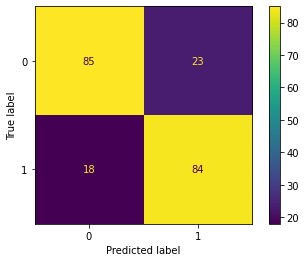

In [55]:
mt.plot_confusion_matrix(dtc,x_test,y_test)
plt.show()

In [56]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x,y)

SVC()

In [58]:
y_pred = clf.predict(x_test)

0.5952380952380952
              precision    recall  f1-score   support

           0       0.58      0.76      0.66       108
           1       0.62      0.42      0.50       102

    accuracy                           0.60       210
   macro avg       0.60      0.59      0.58       210
weighted avg       0.60      0.60      0.58       210

[[82 26]
 [59 43]]


/Users/Pking/anaconda3/envs/comp7103-venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


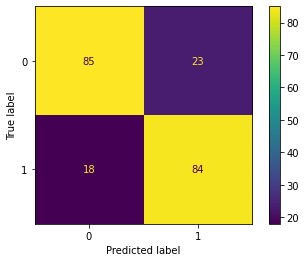

In [65]:
import sklearn.metrics as mt
print(mt.accuracy_score(y_test, y_pred))
print(mt.classification_report(y_test, y_pred))
print(mt.confusion_matrix(y_test, y_pred))

mt.plot_confusion_matrix(dtc,x_test,y_test)
plt.show()

In [60]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(x)
distances, indices = nbrs.kneighbors(x)
indices

array([[402,   0],
       [  1,  94],
       [205,   2],
       ...,
       [697, 676],
       [698, 512],
       [245, 457]])

In [61]:
distances

array([[0.        , 0.        ],
       [0.        , 1.41421356],
       [0.        , 0.        ],
       ...,
       [0.        , 7.07106781],
       [0.        , 1.41421356],
       [0.        , 0.        ]])

In [62]:
nbrs.kneighbors_graph(x).toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

0.5904761904761905
              precision    recall  f1-score   support

           0       0.55      0.72      0.63       100
           1       0.65      0.47      0.55       110

    accuracy                           0.59       210
   macro avg       0.60      0.60      0.59       210
weighted avg       0.60      0.59      0.58       210

[[72 28]
 [58 52]]


/Users/Pking/anaconda3/envs/comp7103-venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


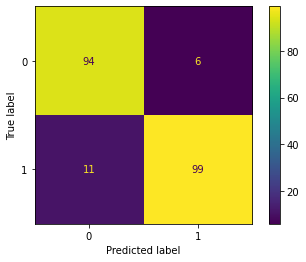

In [126]:
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(x, y)
y_pred = clf.predict(x_test)

print(mt.accuracy_score(y_test, y_pred))
print(mt.classification_report(y_test, y_pred))
print(mt.confusion_matrix(y_test, y_pred))

mt.plot_confusion_matrix(dtc,x_test,y_test)
plt.show()

In [70]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt



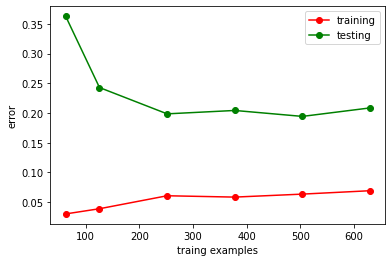

In [71]:

train_sizes,train_score,test_score = learning_curve(RandomForestClassifier(),x,y,train_sizes=[0.1,0.2,0.4,0.6,0.8,1],cv=10,scoring='accuracy')
train_error =  1- np.mean(train_score,axis=1)
test_error = 1- np.mean(test_score,axis=1)
plt.plot(train_sizes,train_error,'o-',color = 'r',label = 'training')
plt.plot(train_sizes,test_error,'o-',color = 'g',label = 'testing')
plt.legend(loc='best')
plt.xlabel('traing examples')
plt.ylabel('error')
plt.show()

In [75]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier()

scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')

print("accuracy", scores)
print("avg accuracy:",scores.mean())


/Users/Pking/anaconda3/envs/comp7103-venv/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Users/Pking/anaconda3/envs/comp7103-venv/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Users/Pking/anaconda3/envs/comp7103-venv/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Users/Pking/anaconda3/envs/comp7103-venv/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Users/Pking/anaconda3/envs/comp7103

accuracy [0.62857143 0.78571429 0.82857143 0.65714286 0.64285714 0.75714286
 0.74285714 0.65714286 0.72857143 0.65714286]
avg accuracy: 0.7085714285714285


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as mt



In [90]:
# train use Naive bayers model
model = MultinomialNB()

model.fit(x_train, y_train)

MultinomialNB()

In [91]:
# Generate predictions on test sets
x_test_tfidf = tfidf_vect.transform(x_test)
predictions = model.predict(x_test_tfidf)

/Users/Pking/anaconda3/envs/comp7103-venv/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  "X does not have valid feature names, but"


In [92]:
print(mt.accuracy_score(y_test, y_pred))
print(mt.classification_report(y_test, y_pred))
print(mt.confusion_matrix(y_test, y_pred))

0.5952380952380952
              precision    recall  f1-score   support

           0       0.58      0.76      0.66       108
           1       0.62      0.42      0.50       102

    accuracy                           0.60       210
   macro avg       0.60      0.59      0.58       210
weighted avg       0.60      0.60      0.58       210

[[82 26]
 [59 43]]


Feature: attrL, Score: 0.00161
Feature: attrU, Score: 4.25462
Feature: attrH, Score: 0.00000
Feature: ctf, Score: 1.87012


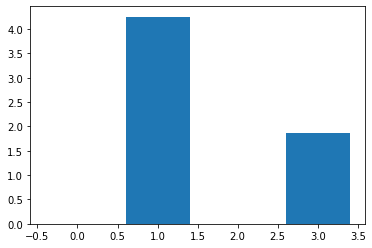

In [101]:
# logistic regression for feature importance on a regression problem
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

model = LogisticRegression()
model.fit(x, y)
importance = model.coef_[0]

label = ["attrL","attrU","attrH","ctf"]
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (label[i],v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: attrL, Score: 0.40691
Feature: attrU, Score: 0.31886
Feature: attrH, Score: 0.00000
Feature: ctf, Score: 0.27423


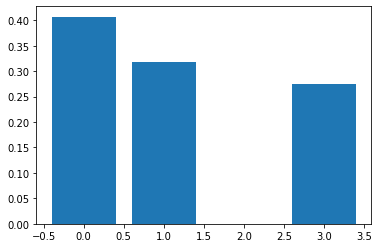

In [103]:
# Random Forest for feature importance on a regression problem
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

model = RandomForestClassifier()
model.fit(x, y)
importance = model.feature_importances_

label = ["attrL","attrU","attrH","ctf"]
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (label[i],v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: attrL, Score: 0.32388
Feature: attrU, Score: 0.30985
Feature: attrH, Score: 0.00000
Feature: ctf, Score: 0.36628


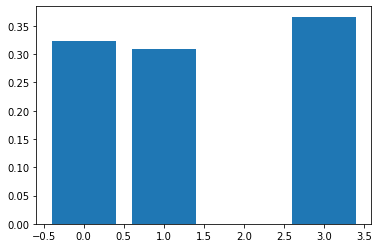

In [106]:
# Decision Tree Classifier for feature importance on a regression problem
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

model = DecisionTreeClassifier()
model.fit(x, y)
importance = model.feature_importances_

label = ["attrL","attrU","attrH","ctf"]
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (label[i],v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [120]:
# use Youtube04- Enimem.csv to validate the classifier

validate_data = Eminem
validate_data.drop(["COMMENT_ID","DATE","AUTHOR"], axis = 1, inplace = True)
validate_data["CONTENT"] = validate_data["CONTENT"].str.lower()
validate_data["attrL"] = validate_data["CONTENT"].map(lambda x: len(str(x)))
validate_data["attrU"] = validate_data["CONTENT"].str.contains("(http|https)://").astype(int)
validate_data["attrH"] = validate_data["CONTENT"].str.contains("&+;").astype(int)
validate_data["ctf"] = validate_data["CONTENT"].map(lambda x: x.count("video") + x.count("Song") + x.count("check") + x.count("subscribe") + x.count("channel"))
validate_data.drop(["CONTENT"], axis = 1, inplace = True)

validate_data

/Users/Pking/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """


,CLASS,attrL,attrU,attrH,ctf
0,1,41,0,0,0
1,0,47,0,0,0
2,1,201,1,0,0
3,0,5,0,0,0
4,1,30,0,0,0
...,...,...,...,...,...
443,1,40,0,0,2
444,1,61,0,0,2
445,1,500,0,0,1
446,0,44,0,0,0


In [136]:
import pandas
x_test= pd.get_dummies(validate_data.drop(columns="CLASS"))
y_test = validate_data["CLASS"]

x_test

,attrL,attrU,attrH,ctf
0,41,0,0,0
1,47,0,0,0
2,201,1,0,0
3,5,0,0,0
4,30,0,0,0
...,...,...,...,...
443,40,0,0,2
444,61,0,0,2
445,500,0,0,1
446,44,0,0,0


In [137]:
x_train = pd.get_dummies(train_data.drop(columns="CLASS"))
y_train = train_data["CLASS"]

x_train

,attrL,attrU,attrH,ctf
0,56,0,0,2
1,166,0,0,3
2,38,0,0,0
3,48,0,0,1
4,39,0,0,1
...,...,...,...,...
345,95,0,0,0
346,6,0,0,0
347,439,0,0,1
348,195,0,0,0


0.8303571428571429
              precision    recall  f1-score   support

           0       0.74      0.96      0.84       203
           1       0.96      0.72      0.82       245

    accuracy                           0.83       448
   macro avg       0.85      0.84      0.83       448
weighted avg       0.86      0.83      0.83       448

[[195   8]
 [ 68 177]]


/Users/Pking/anaconda3/envs/comp7103-venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


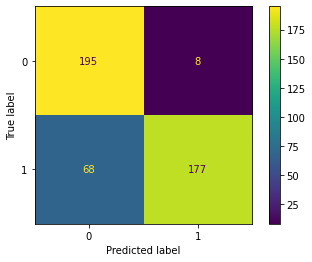

In [139]:
from sklearn.model_selection import train_test_split

dtc = tree.DecisionTreeClassifier().fit(x_train, y_train)

y_pred = dtc.predict(x_test)

print(mt.accuracy_score(y_test, y_pred))
print(mt.classification_report(y_test, y_pred))
print(mt.confusion_matrix(y_test, y_pred))

mt.plot_confusion_matrix(dtc,x_test,y_test)
plt.show()